In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('./src/preprocessing/file')
from dataset import DataSet
from loader import Loader


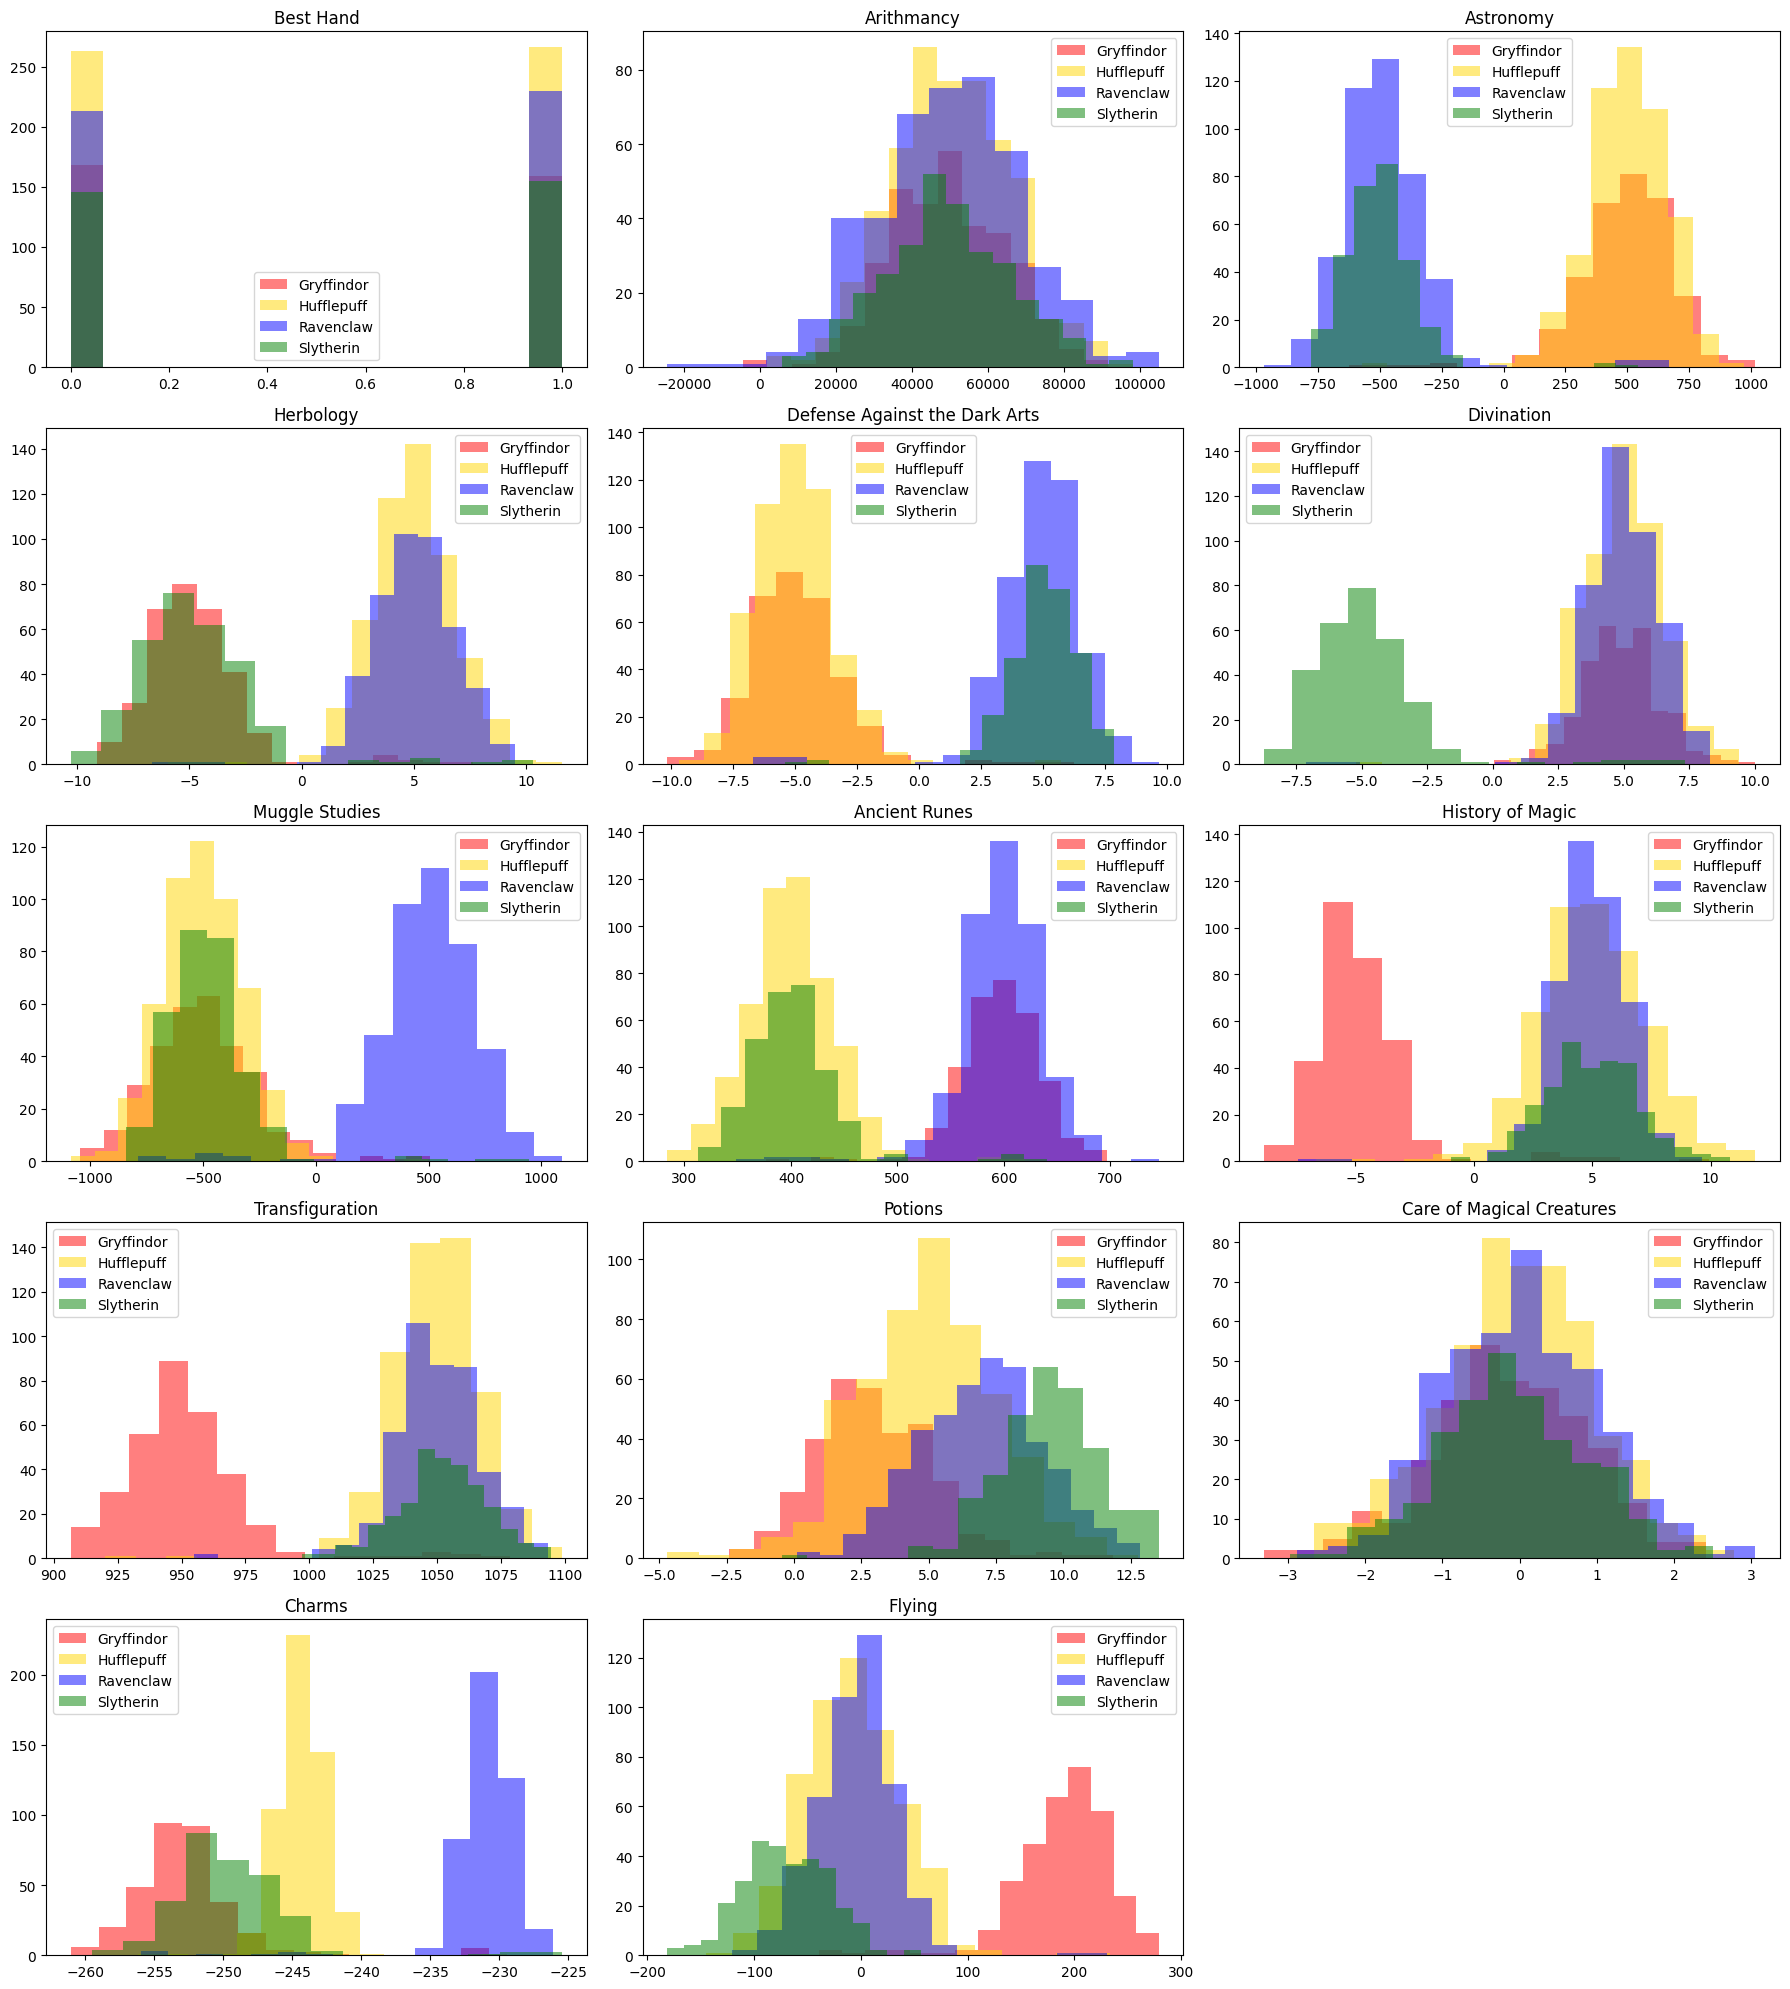

In [5]:
colors = {
    "Gryffindor": "red",
    "Ravenclaw": "blue",
    "Hufflepuff": "gold",
    "Slytherin": "green"
}

loader = Loader()
dataset = loader.load("./datasets/dataset_train.csv")

data = dataset.get_all()
headers = dataset.get_headers()

houses_col_idx = headers["Hogwarts House"]
course_cols = [k for k in headers if k not in (
    "Index", "Hogwarts House", "First Name", "Last Name", "Birthday")]
course_indices = [headers[k] for k in course_cols]

unique_houses = np.unique(data[:, houses_col_idx])

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axs = axs.flatten()

for i, course in enumerate(course_cols):
    ax = axs[i]
    course_idx = headers[course]
    for house in unique_houses:
        mask = data[:, houses_col_idx] == house
        scores = data[mask, course_idx]
        scores = scores[scores != ''] 
        scores = scores.astype(float)
        ax.hist(scores, bins=15, alpha=0.5, label=house, color=colors[house])
    ax.set_title(course)
    ax.legend()

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


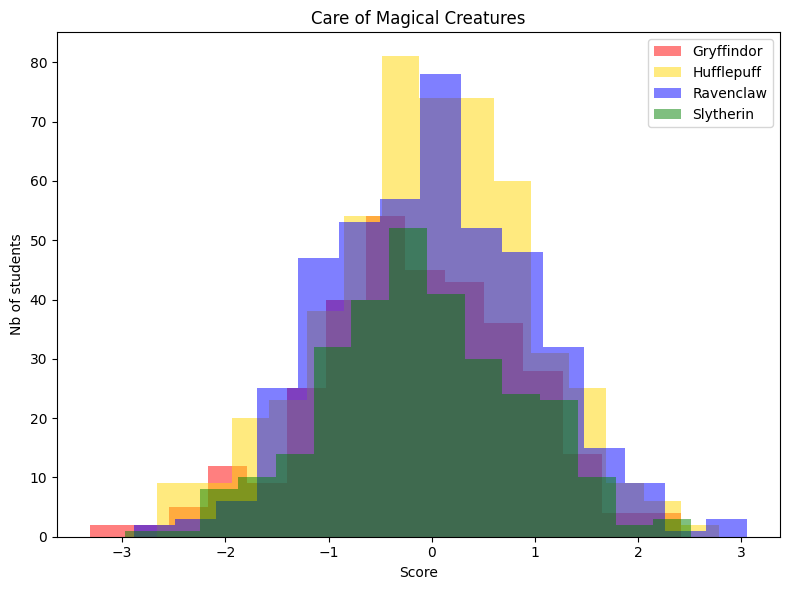

In [28]:
colors = {
    "Gryffindor": "red",
    "Ravenclaw": "blue",
    "Hufflepuff": "gold",
    "Slytherin": "green"
}

loader = Loader()
dataset = loader.load("./datasets/dataset_train.csv")

data = dataset.get_all()
headers = dataset.get_headers()

course = "Care of Magical Creatures"
course_idx = headers[course]
houses_col_idx = headers["Hogwarts House"]
unique_houses = np.unique(data[:, houses_col_idx])
fig, ax = plt.subplots(figsize=(8, 6))

for house in unique_houses:
    mask = data[:, houses_col_idx] == house
    scores = data[mask, course_idx]
    scores = scores[scores != ''] 
    scores = scores.astype(float)
    ax.hist(scores, bins=15, alpha=0.5, label=house, color=colors[house])
ax.set_title(course)
ax.set_xlabel("Score")
ax.set_ylabel("Nb of students")
ax.legend()

plt.tight_layout()
plt.show()


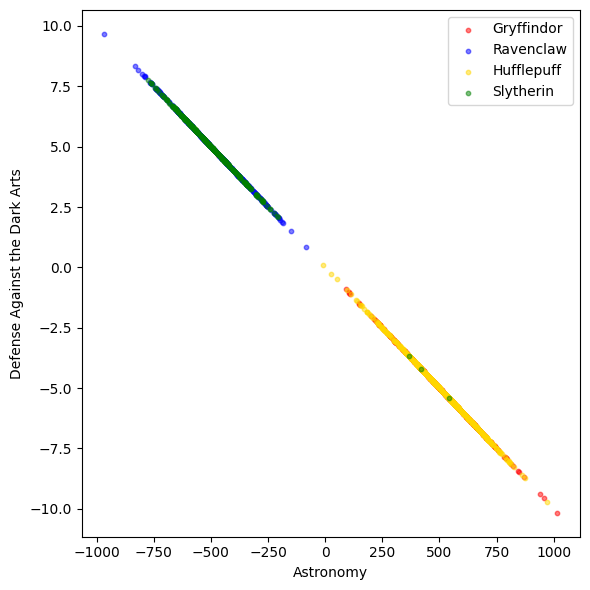

In [20]:
loader = Loader()
dataset = loader.load("./datasets/dataset_train.csv")
data = dataset.get_all()
headers = dataset.get_headers()

x_course = "Astronomy"
y_course = "Defense Against the Dark Arts"

idx_x = headers[x_course]
idx_y = headers[y_course]
idx_house = headers["Hogwarts House"]

colors = {
    "Gryffindor": "red",
    "Ravenclaw": "blue",
    "Hufflepuff": "gold",
    "Slytherin": "green"
}

plt.figure(figsize=(6, 6))
for house, color in colors.items():
    mask_house = data[:, idx_house] == house
    x_vals = data[mask_house, idx_x]
    y_vals = data[mask_house, idx_y]

    mask_valid = (x_vals != "") & (y_vals != "")
    x_vals = x_vals[mask_valid].astype(float)
    y_vals = y_vals[mask_valid].astype(float)

    plt.scatter(x_vals, y_vals, alpha=0.5, label=house, color=color, s=10)

plt.xlabel(x_course)
plt.ylabel(y_course)
plt.legend()
plt.tight_layout()
plt.show()

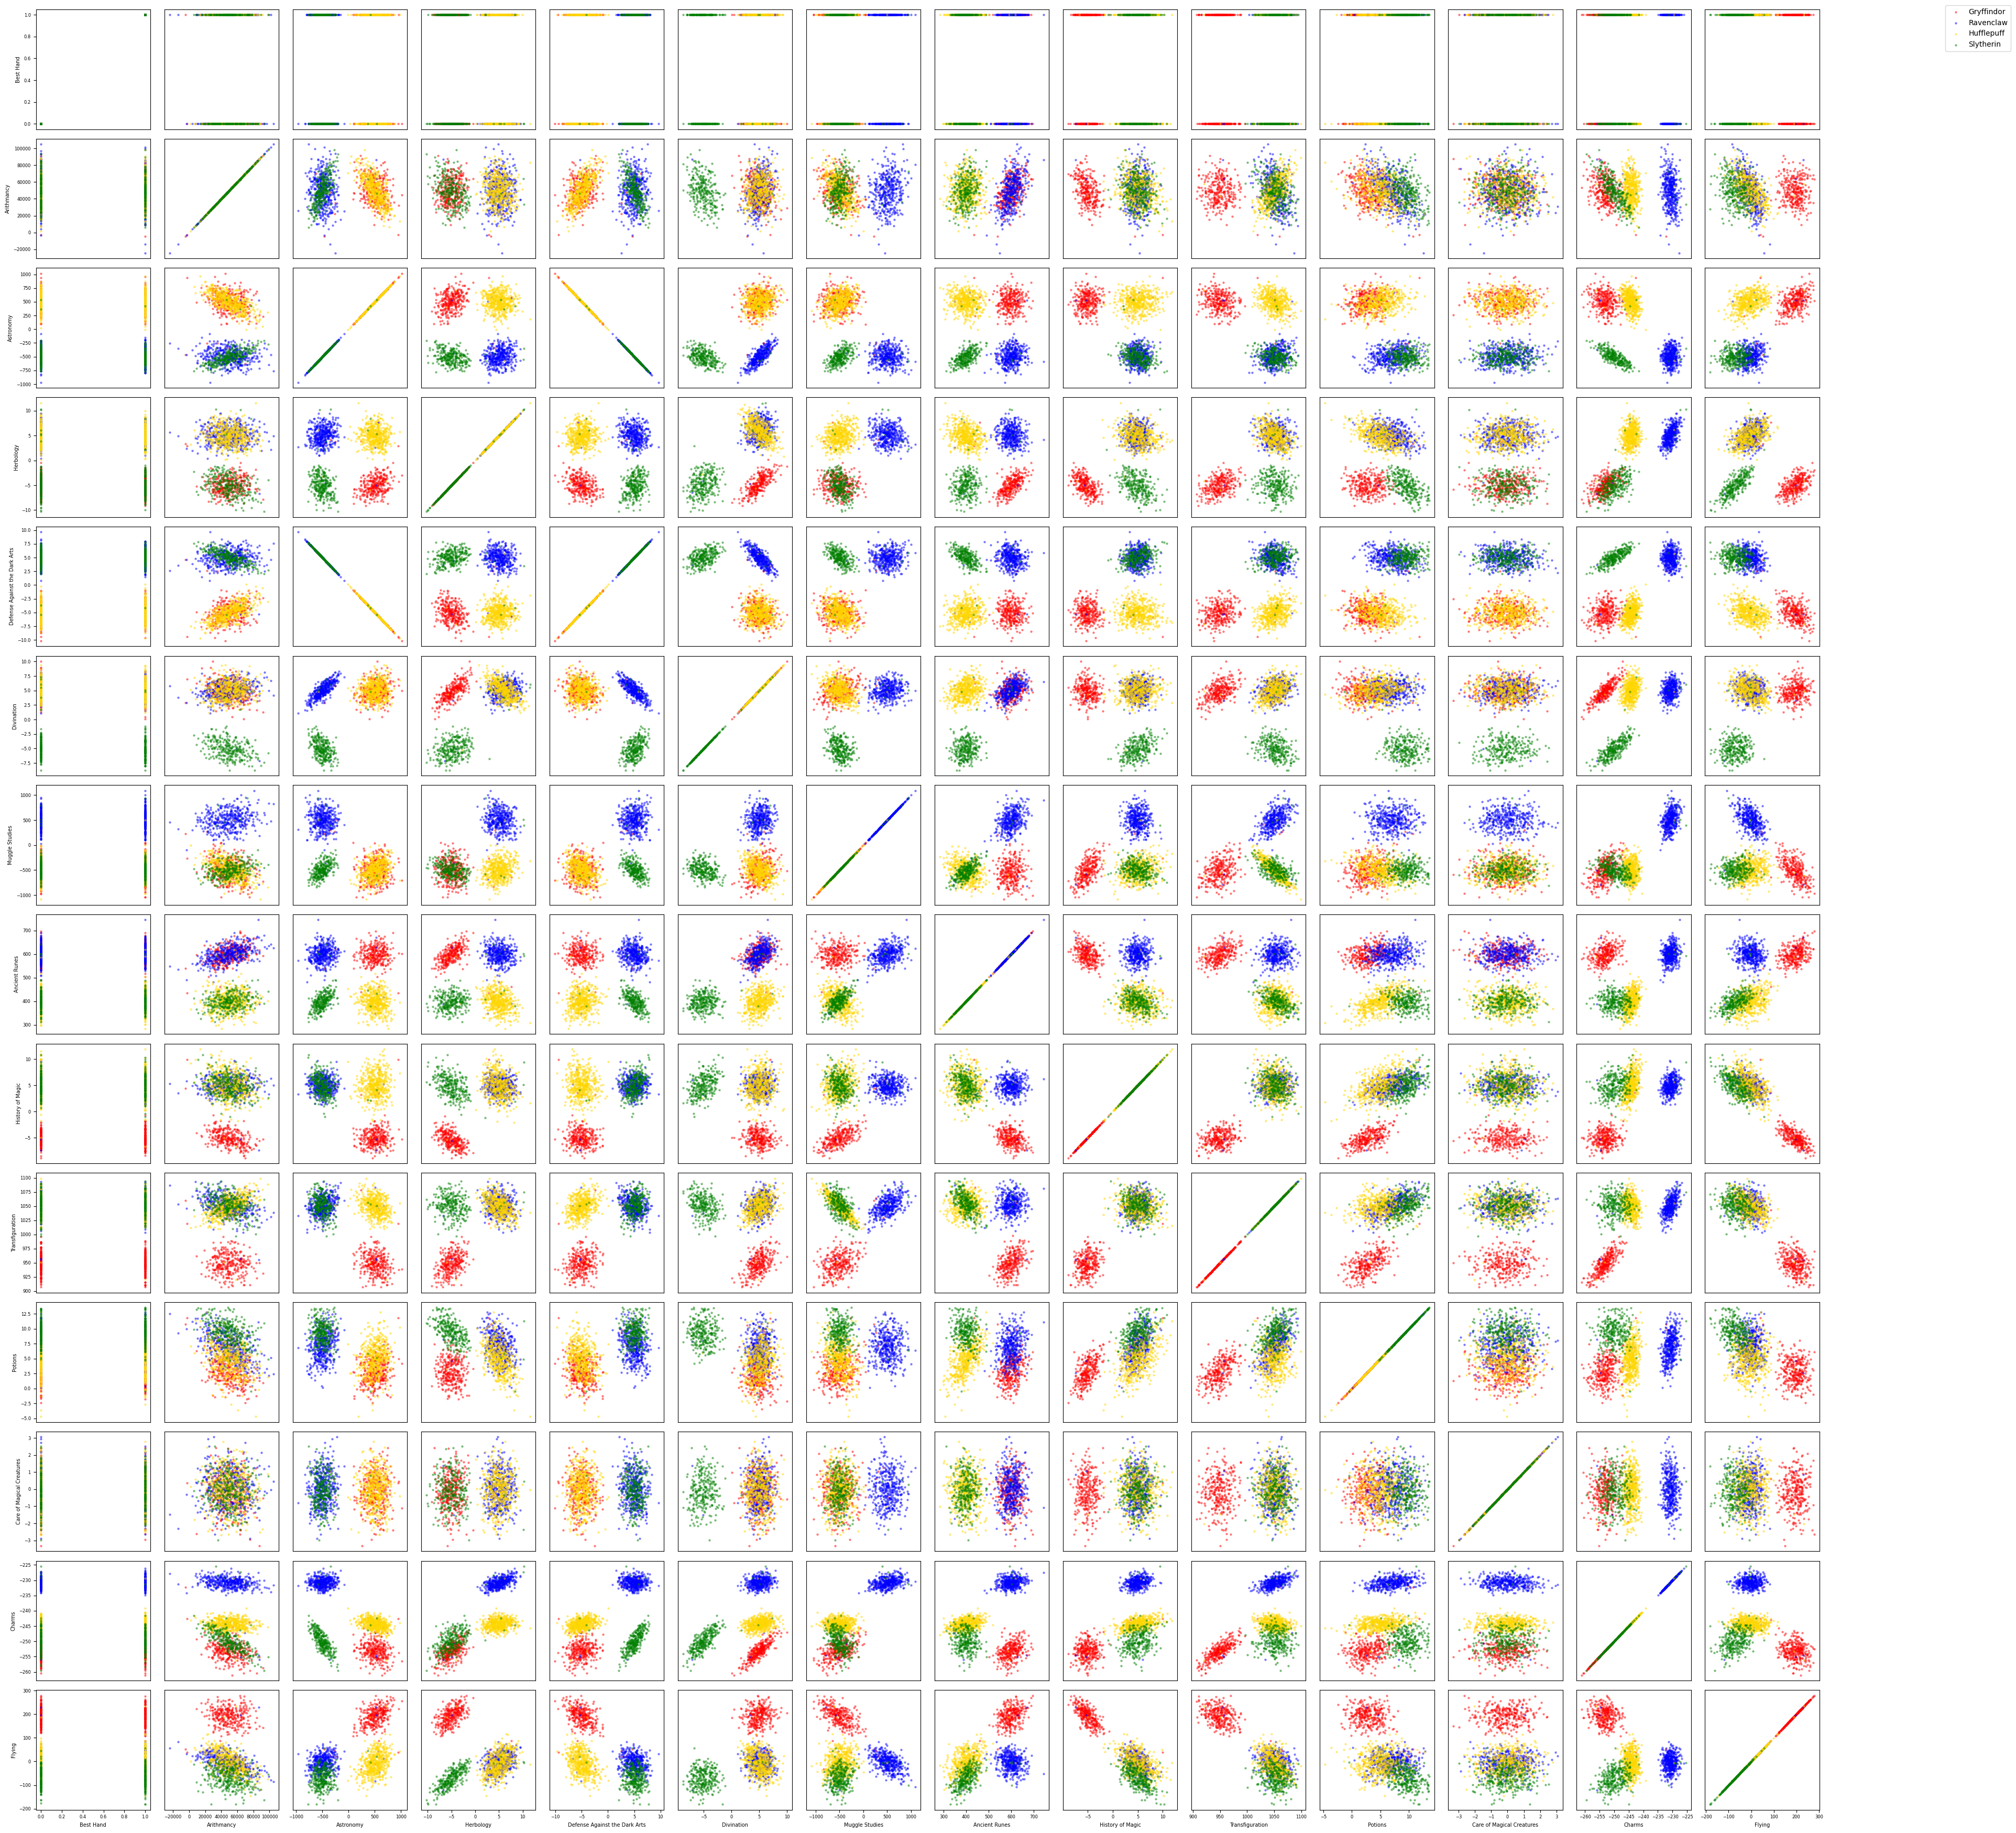

In [6]:
colors = {
    "Gryffindor": "red",
    "Ravenclaw": "blue",
    "Hufflepuff": "gold",
    "Slytherin": "green"
}

loader = Loader()
dataset = loader.load("./datasets/dataset_train.csv")
data = dataset.get_all()
headers = dataset.get_headers()

excluded = {"Index", "Hogwarts House", "First Name", "Last Name", "Birthday"}
course_cols = [k for k in headers if k not in excluded]
n = len(course_cols)
houses_col_idx = headers["Hogwarts House"]

fig, axs = plt.subplots(n, n, figsize=(n * 2.5, n * 2.5))

for i, row_course in enumerate(course_cols):
    for j, col_course in enumerate(course_cols):
        ax = axs[i, j]
        idx_row = headers[row_course]
        idx_col = headers[col_course]

        for house, color in colors.items():
            mask_house = (data[:, houses_col_idx] == house)
            x = data[:, idx_col]
            y = data[:, idx_row]

            mask_valid = (x != "") & (y != "") & mask_house
            x_vals = x[mask_valid].astype(float)
            y_vals = y[mask_valid].astype(float)

            ax.scatter(x_vals, y_vals, alpha=0.4, label=house, color=color, s=5)

        if i == n - 1:
            ax.set_xlabel(col_course, fontsize=7)
        else:
            ax.set_xticks([])

        if j == 0:
            ax.set_ylabel(row_course, fontsize=7)
        else:
            ax.set_yticks([])

        ax.tick_params(axis='both', which='major', labelsize=6)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()
